# data processing

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
train_df = pd.read_csv('../input/train.csv')

In [3]:
test_df = pd.read_csv('../input/test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 删除PassengerId

In [6]:
# train_df.drop('PassengerId', inplace=True, axis=1)

In [7]:
# train_df.isnull().any()

# Pclass

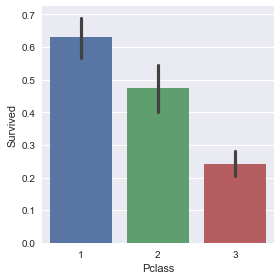

In [8]:
sns.factorplot(x='Pclass', y='Survived', data=train_df, kind='bar')

In [9]:
pclass = train_df[['Pclass', 'Survived']].groupby('Pclass').mean()

In [10]:
pclass = pclass.reset_index()

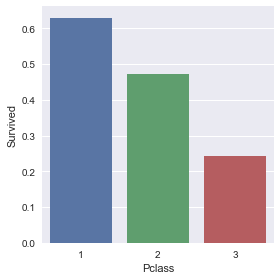

In [11]:
sns.factorplot(x='Pclass', y="Survived", data=pclass, kind='bar')

# Sex

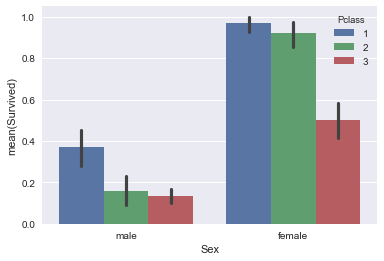

In [12]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_df)

# Age

In [13]:
train_df.Age.min(), train_df.Age.max()

(0.41999999999999998, 80.0)

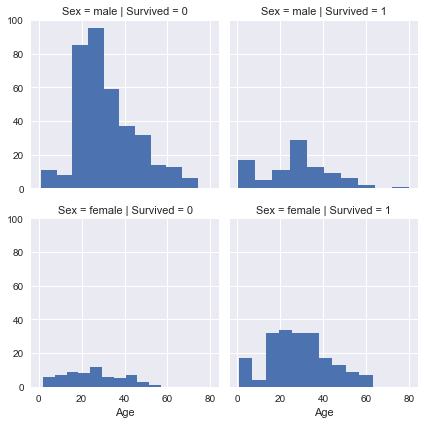

In [14]:
g = sns.FacetGrid(row='Sex', col='Survived',data=train_df)
g.map(plt.hist, 'Age')

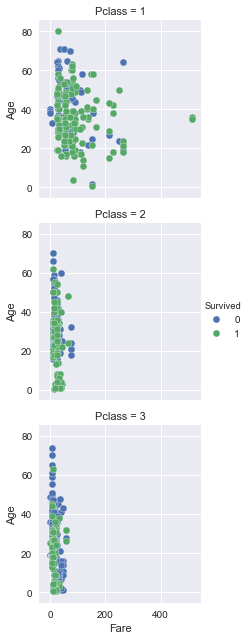

In [15]:
g = sns.FacetGrid(data=train_df, row='Pclass', hue='Survived')
g.map(plt.scatter,'Fare', 'Age', edgecolor='w').add_legend()

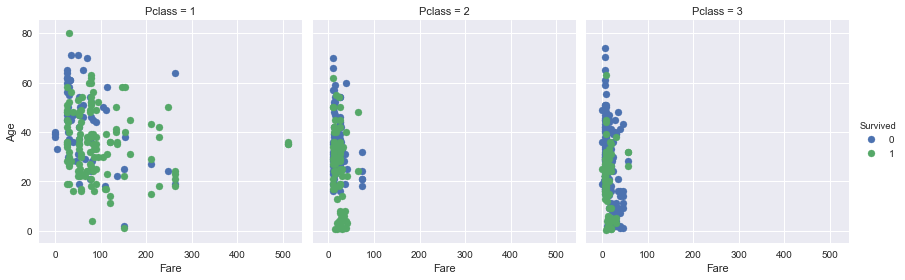

In [16]:
g = sns.FacetGrid(train_df, col='Pclass', hue='Survived', size=4)
g.map(plt.scatter, 'Fare', 'Age').add_legend()

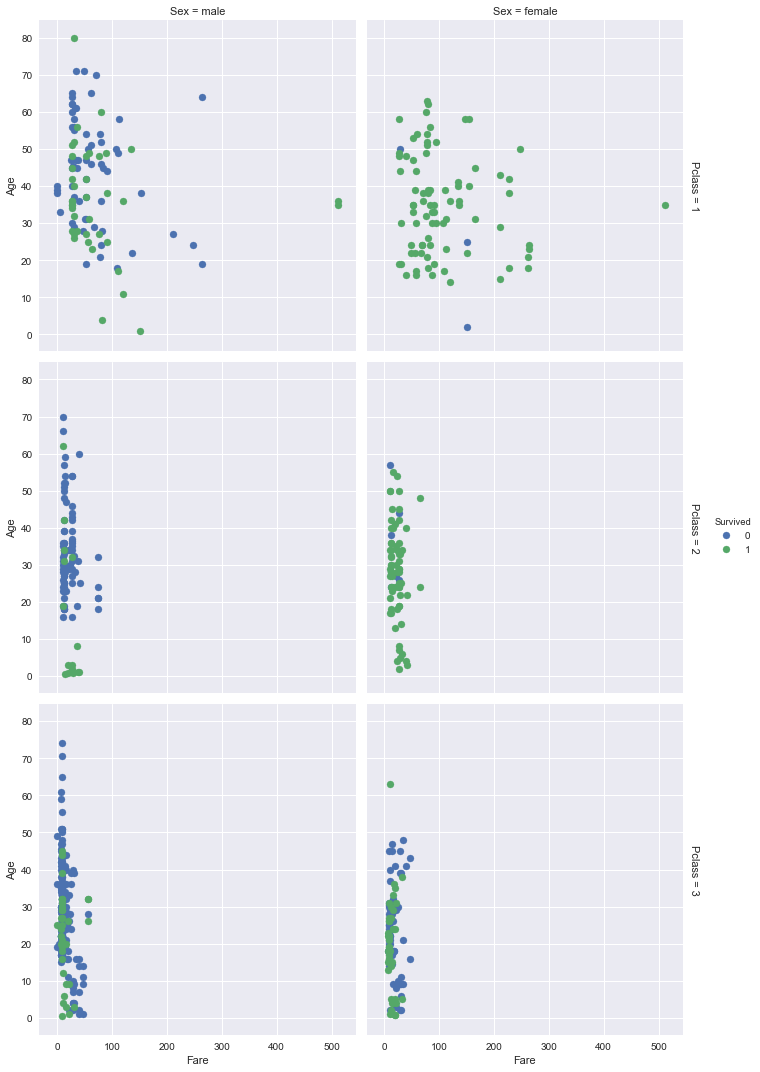

In [17]:
g = sns.FacetGrid(train_df, col='Sex', row='Pclass', hue='Survived', margin_titles=True, size=5)
g.map(plt.scatter, 'Fare', 'Age').add_legend()

##  用平均值填充年龄

In [18]:
# age = train_df.Age.mean()
# train_df.Age.fillna(age, inplace=True, )

In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# SibSp, Parch

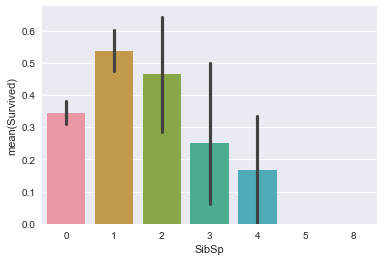

In [20]:
sns.barplot(x='SibSp', y="Survived", data=train_df)

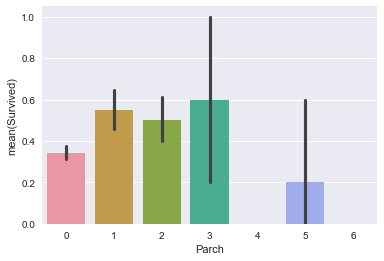

In [21]:
sns.barplot(x='Parch', y="Survived", data=train_df)

In [22]:
## 增加属性Family
train_df['Family'] = train_df['SibSp'] + train_df['Parch']

In [23]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [24]:
train_df.drop('Ticket', axis=1, inplace=True)

In [25]:
train_df[['Pclass', "Fare"]].groupby('Pclass').mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


# cabin

In [26]:
cabin = train_df[['Pclass', 'Cabin']].groupby("Pclass")

In [27]:
np.sort(train_df[train_df['Pclass'] == 1].Cabin.unique())

array([nan, 'A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18', 'B19',
       'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38', 'B39', 'B4',
       'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55', 'B57 B59 B63 B66',
       'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78', 'B79', 'B80',
       'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103', 'C104', 'C106',
       'C110', 'C111', 'C118', 'C123', 'C124', 'C125', 'C126', 'C128',
       'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30', 'C32', 'C45', 'C46',
       'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64', 'C65', 'C68', 'C7',
       'C70', 'C78', 'C82', 'C83', 'C85', 'C86', 'C87', 'C90', 'C91',
       'C92', 'C93', 'C95', 'C99', 'D10 D12', 'D11', 'D15', 'D17', 'D19',
       'D20', 'D21', 'D26', 'D28', 'D30', 'D33', 'D35', 'D36', 'D37',
       'D45', 'D46', 'D47', 'D48', 'D49', 'D50', 'D6', 'D7', 'D9', 'E12',
       'E17', 'E24', 'E25', 'E31', 'E33', 'E34', '

In [28]:
np.sort(train_df[train_df['Pclass'] == 2].Cabin.unique())

array([nan, 'D', 'D56', 'E101', 'E77', 'F2', 'F33', 'F4'], dtype=object)

In [29]:
np.sort(train_df[train_df['Pclass'] == 3].Cabin.unique())

array([nan, 'E10', 'E121', 'F E69', 'F G63', 'F G73', 'F38', 'G6'], dtype=object)

In [30]:
# 找不懂规律，舍弃掉
# train_df.drop('Cabin', axis=1, inplace=True)

In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0


# Embarked

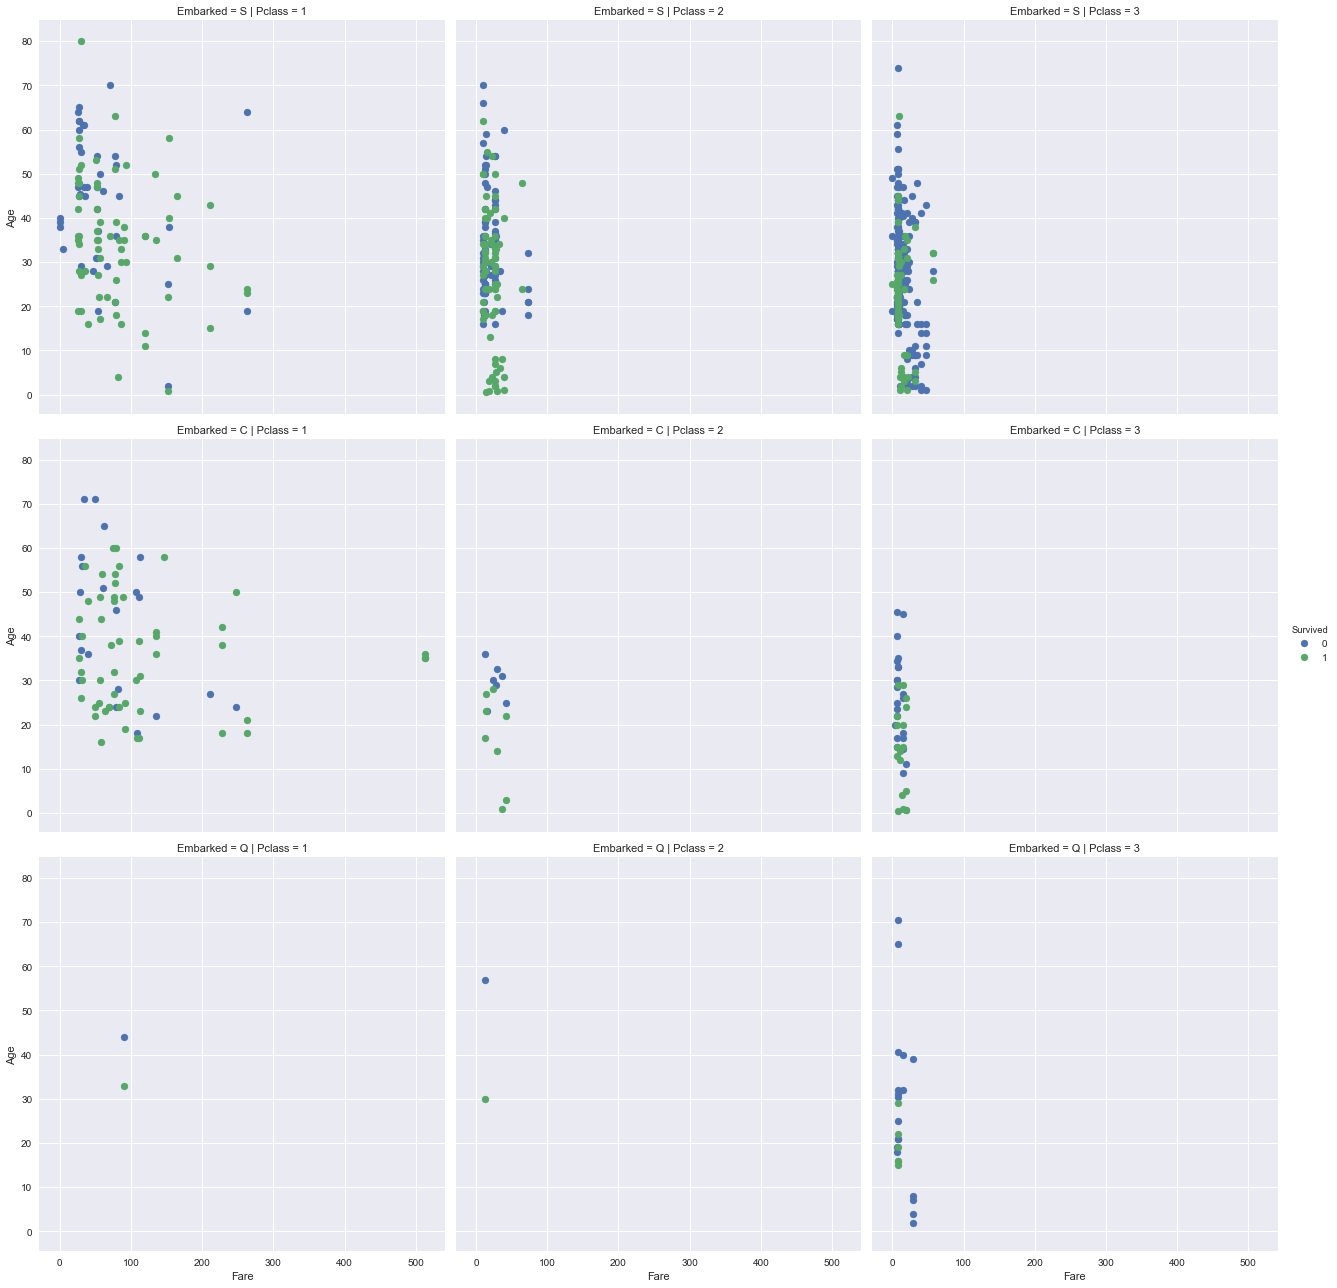

In [32]:
g = sns.FacetGrid(train_df, row='Embarked', col='Pclass', hue='Survived', size=6)
g.map(plt.scatter, 'Fare', 'Age').add_legend()

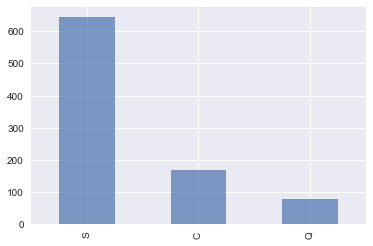

In [33]:
train_df.Embarked.value_counts().plot(kind='bar', alpha=0.7)

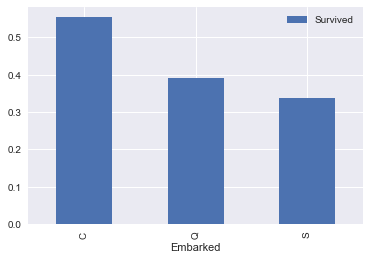

In [34]:
train_df[['Survived', 'Embarked']].groupby('Embarked').mean().plot(kind='bar')

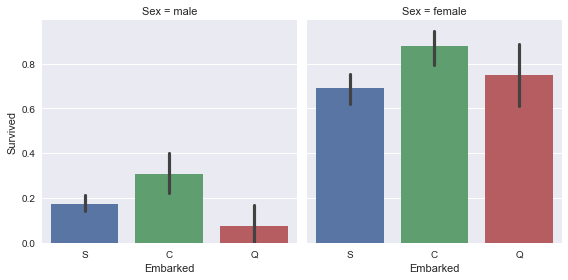

In [35]:
sns.factorplot(x='Embarked', y='Survived', col='Sex', data=train_df, kind='bar')

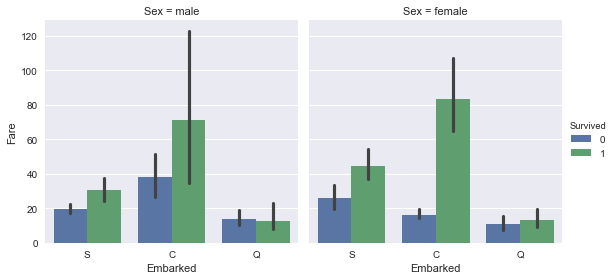

In [36]:
sns.factorplot(x='Embarked', y='Fare', col='Sex', hue='Survived', data=train_df, kind='bar')

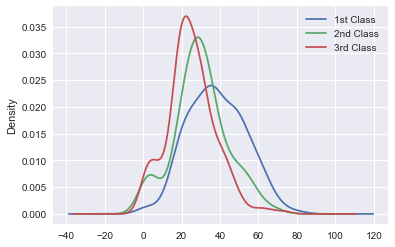

In [37]:
train_df.Age[train_df.Pclass == 1].plot(kind='kde')    
train_df.Age[train_df.Pclass == 2].plot(kind='kde')
train_df.Age[train_df.Pclass == 3].plot(kind='kde')
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;


In [38]:
corr = train_df.corr()

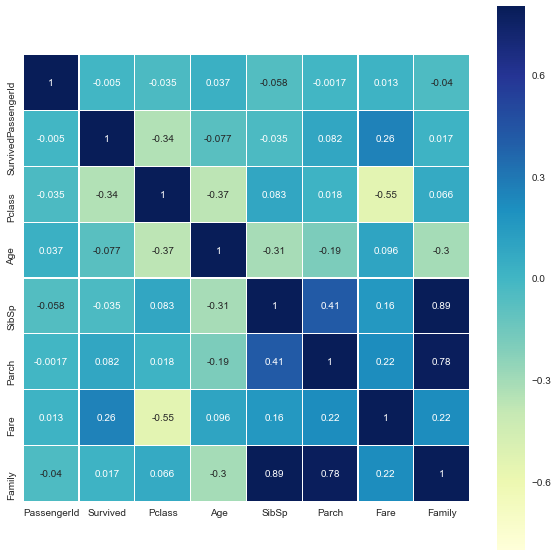

In [39]:
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white",)

In [40]:
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,B28,NaN,0


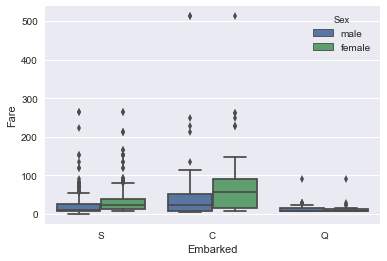

In [41]:
sns.boxplot(x='Embarked', y='Fare', data=train_df, hue='Sex')

In [42]:
train_df.Embarked.fillna('C', inplace=True)

In [72]:
test_df[test_df.Embarked.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck


# Feature Engineering

In [64]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,Z
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,Z
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,Z


In [65]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [45]:
train_df['Deck'] = train_df.Cabin.str[0]

In [67]:
test_df['Deck'] = test_df.Cabin.str[0]

In [48]:
train_df.Deck.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

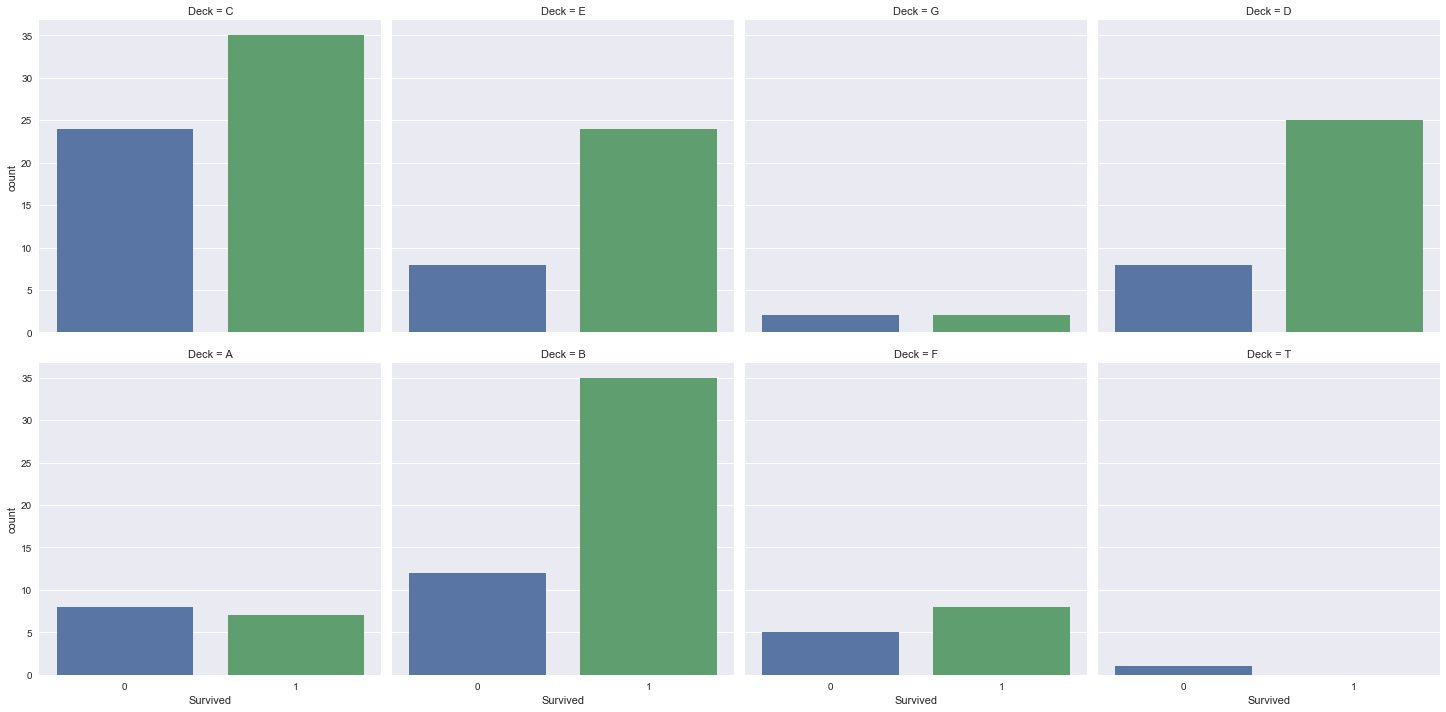

In [52]:
sns.factorplot(data=train_df, col='Deck', x="Survived", kind='count',col_wrap=4, size=5)

In [62]:
train_df.Deck.fillna('Z', inplace=True)


In [68]:
test_df.Deck.fillna('Z', inplace=True)

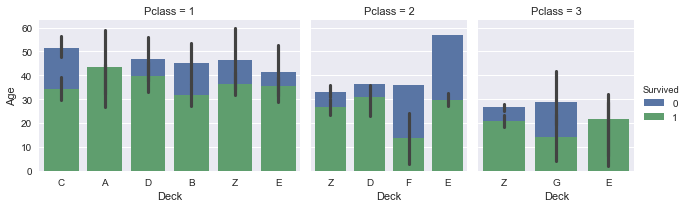

In [70]:
plt.figure(figsize=(15, 5))
g = sns.FacetGrid(train_df, col="Pclass",hue='Survived', sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.barplot, "Deck", "Age").add_legend();


# Family

In [73]:
test_df['Family'] = test_df['SibSp'] + test_df['Parch']

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64